# Logic gates with Neural Networks (Backpropogation)

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', None)

## Activation function: Sigmoid function

In [2]:
def sigmoid(x):
    """Implementing the sigmoid function for x.
    sig(x) = 1/(1+e^-x)

    Args:
        x: input for which signmoid function needs to be calculated.

    Returns:
        the sigmoid function.
    """
    return 1 / (1 + (np.exp(-x)))

In [3]:
def sigmoid_derivative(x):
    """Implementing the sigmoid function for x.
    sig'(x) = x * (1-x)

    Args:
        x: input for which derivative of signmoid function needs to be calculated.

    Returns:
        the derivative of sigmoid function.
    """
    return sigmoid(x) * (1-sigmoid(x))

## Setting input, `X` and output, `Y_target`

In [4]:
def define_output():
    outputs = {
        'and': [[0], [0], [0], [1]], 'nand': [[1], [1], [1], [0]], 'or': [[0], [1], [1], [1]],
        'nor': [[1], [0], [0], [0]], 'xor': [[0], [1], [1], [0]], 'xnor': [[1], [0], [0], [1]]
    }

    lg = """
    █░░ █▀▀█ █▀▀▀ ░▀░ █▀▀ 　 █▀▀▀ █▀▀█ ▀▀█▀▀ █▀▀ █▀▀ 
    █░░ █░░█ █░▀█ ▀█▀ █░░ 　 █░▀█ █▄▄█ ░░█░░ █▀▀ ▀▀█ 
    ▀▀▀ ▀▀▀▀ ▀▀▀▀ ▀▀▀ ▀▀▀ 　 ▀▀▀▀ ▀░░▀ ░░▀░░ ▀▀▀ ▀▀▀
    
    A B | AND NAND OR NOR XOR XNOR
    -------------------------------
    0 0 |  0    1   0  1   0   1
    0 1 |  0    1   1  0   1   0
    1 0 |  0    1   1  0   1   0
    1 1 |  1    0   1  0   0   1
    """
    print(lg)

    while True:
        try:
            output_gate = input('Enter your chosen logic gate: ').lower()
            break
        except KeyError:
            print('Invalid logic gate, try again!\n')

    return np.array(outputs[output_gate]), output_gate

## Training

In [5]:
def train_network(initial_weights, total_epochs=200000):
    print(f"\n---------- STARTING TRAINING FOR {total_epochs} ----------\n")

    W1, W2 = initial_weights

    for epoch in range(1, total_epochs+1):
        # forward propagation
        Z = np.dot(X, W1)
        H = sigmoid(Z)

        U = np.dot(H, W2)
        Y = sigmoid(U)

        # calculate Loss function (Mean Square error loss)
        E = abs(Y - Y_target)
        L = 1/2 * (np.power(E, 2))

        # backpropagation - Stage 1
        dL_dY = Y - Y_target
        dY_dU = Y * (1-Y)
        dU_dW2 = H

        dL_dW2 = np.dot(dU_dW2.T,dL_dY*dY_dU)

        # weight updates in stage 1
        W2 -= lr*dL_dW2

        # backpropagation - Stage 2
        dL_dY = Y-Y_target
        dY_dU = Y*(1-Y)
        dU_dH = W2
        dH_dZ = H*(1-H)
        dZ_dW1 = X

        dL_dH = np.dot(dL_dY*dY_dU,dU_dH.T)
        dL_dW1 = np.dot(dZ_dW1.T,dH_dZ*dL_dH)

        # weight updates in stage 2
        W1 -= lr*dL_dW1

        if epoch % 20000 == 0:
            print("%6d -   %5s: %.4f    %8s: %.4f" % (epoch, 'Error', E.sum(), 'MSE loss', L.sum()))

    print("\n---------- ENDING TRAINING ----------")

    return W1, W2

## Final program


    █░░ █▀▀█ █▀▀▀ ░▀░ █▀▀ 　 █▀▀▀ █▀▀█ ▀▀█▀▀ █▀▀ █▀▀ 
    █░░ █░░█ █░▀█ ▀█▀ █░░ 　 █░▀█ █▄▄█ ░░█░░ █▀▀ ▀▀█ 
    ▀▀▀ ▀▀▀▀ ▀▀▀▀ ▀▀▀ ▀▀▀ 　 ▀▀▀▀ ▀░░▀ ░░▀░░ ▀▀▀ ▀▀▀
    
    A B | AND NAND OR NOR XOR XNOR
    -------------------------------
    0 0 |  0    1   0  1   0   1
    0 1 |  0    1   1  0   1   0
    1 0 |  0    1   1  0   1   0
    1 1 |  1    0   1  0   0   1
    
Enter your chosen logic gate: xor


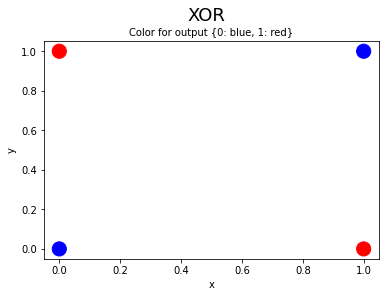


Learning rate: 0.05

---------- STARTING TRAINING FOR 100000 ----------

 20000 -   Error: 0.6476    MSE loss: 0.0525
 40000 -   Error: 0.2209    MSE loss: 0.0067
 60000 -   Error: 0.1623    MSE loss: 0.0037
 80000 -   Error: 0.1343    MSE loss: 0.0026
100000 -   Error: 0.1170    MSE loss: 0.0020

---------- ENDING TRAINING ----------

WEIGHTS
        W11       W12       W13       W14       W15       W16       W21       W22       W23
0 -3.472627  5.843277  5.585736 -3.472627 -3.472627 -3.472627 -9.885644 -9.885644 -9.885644
1 -3.472627  5.843277  5.585736 -3.472627 -3.472627 -3.472627 -9.885644 -9.885644 -9.885644



---------- STARTING TRAINING FOR 200000 ----------

 20000 -   Error: 0.6476    MSE loss: 0.0525
 40000 -   Error: 0.2209    MSE loss: 0.0067
 60000 -   Error: 0.1623    MSE loss: 0.0037
 80000 -   Error: 0.1343    MSE loss: 0.0026
100000 -   Error: 0.1170    MSE loss: 0.0020
120000 -   Error: 0.1050    MSE loss: 0.0016
140000 -   Error: 0.0960    MSE loss: 0.0014
160000 

In [6]:
all_epochs = [100000, 200000, 500000]
all_initial_times = []
all_final_times = []

# learning rate
lr = 0.05

# set the Input datasets
X = np.array([[0,0],[0,1],[1,0],[1,1]])

# set the expected output
Y_target, output_gate = define_output()

# plotting expected output
colormap = np.array(['b', 'r'])
plt.scatter([i[0] for i in X], [i[1] for i in X], c=colormap[Y_target.flatten()], s=200)
plt.xlabel('x')
plt.ylabel('y')
plt.suptitle(output_gate.upper(), y=1, fontsize=18)
plt.title('Color for output {0: blue, 1: red}', fontsize=10)
plt.show()

print("\nLearning rate:", lr)

for epochs in all_epochs:
    # initial time
    initial_time = datetime.datetime.now()
    all_initial_times.append(initial_time)

    # assigning random weights
    # 6 for hidden layer, 3 for output layer
    initial_W1 = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
    initial_W2 = np.array([[0.7], [0.8], [0.9]])

    W1, W2 = train_network([initial_W1, initial_W2], epochs)

    weights_frame = pd.DataFrame({
        'W11': [initial_W1[0][0], W1[0][0]],
        'W12': [initial_W1[0][1], W1[0][1]],
        'W13': [initial_W1[0][2], W1[0][2]],
        'W14': [initial_W1[0][0], W1[0][0]],
        'W15': [initial_W1[0][0], W1[0][0]],
        'W16': [initial_W1[0][0], W1[0][0]],
        'W21': [initial_W2[0][0], W2[0][0]],
        'W22': [initial_W2[0][0], W2[0][0]],
        'W23': [initial_W2[0][0], W2[0][0]],
    })

    print('\nWEIGHTS')
    print(weights_frame.to_string())
    print('\n')

    # final time
    final_time = datetime.datetime.now()
    all_final_times.append(final_time)

## Testing

In [7]:
z_vals = []
h_vals = []
u_vals = []
y_vals = []
preds = []

for point in X:
    point = np.array(point)
    z = np.dot(point, W1)
    z_vals.append(z)

    h = sigmoid(z)
    h_vals.append(h)

    op = np.dot(h, W2)
    u_vals.append(op)

    y_cap = sigmoid(op)
    y_vals.append(y_cap)

    preds.append(round(y_cap[0]))

print(f"LOGIC GATE: {output_gate.upper()}")
pd.DataFrame.from_dict({
    'Input1': X.reshape(-1)[::2],
    'Input2': X.reshape(-1)[1::2],
    'Z': z_vals,
    'H': h_vals,
    'U': u_vals,
    'Y': y_vals,
    'Target': Y_target.reshape(-1),
    'Prediction': preds
})

LOGIC GATE: XOR


Input1  Input2  \
0       0       0   
1       0       1   
2       1       0   
3       1       1   

                                                             Z  \
0                                              [0.0, 0.0, 0.0]   
1   [6.444466070230745, -4.138704558059745, 5.899873000256077]   
2   [-4.132395941018188, 6.461663751248734, 5.884712384439663]   
3  [2.3120701292125574, 2.3229591931889892, 11.78458538469574]   

                                                                H  \
0                                                 [0.5, 0.5, 0.5]   
1   [0.9984132289306397, 0.01569328621728696, 0.9972676932046957]   
2  [0.015791033793323882, 0.9984402422008609, 0.9972260699368929]   
3    [0.9098717606345105, 0.9107607434278349, 0.9999923789241137]   

                      U                       Y  Target  Prediction  
0  [-3.895159887302203]  [0.019934648870626886]       0           0  
1  [4.4006729229138095]    [0.9878796248849324]       1           1  
2   [4.400694482818649]    [0.9878798830291259]       1           1  
3   [-5.56381654701233]  [0.003819471063960799]       0           0

## Time Complexity
Time complexity is the amount of time taken by an algorithm to run, as a function of the length of the input. It measures the time taken to execute each statement of code in an algorithm.

Our Neural Network consists of 2 input nodes going into a hidden layer with 3 nodes which in turn goes to the output layer with 1 node. The weighted sum of each layer is going through a sigmoid activation function.

<img src="NN.png" width=600>

In [8]:
def convert_time(time):
    return datetime.timedelta(
        hours=time.hour, minutes=time.minute, seconds=time.second, microseconds=time.microsecond
    )

In [9]:
for initial_time, final_time, epochs in zip(all_initial_times, all_final_times, all_epochs):
    initial_timedelta = convert_time(initial_time)
    final_timedelta = convert_time(final_time)

    # total time taken by program
    print('Total time taken for %7d epochs: %18s' %(epochs, final_timedelta-initial_timedelta))

Total time taken for  100000 epochs:     0:00:03.706519
Total time taken for  200000 epochs:     0:00:07.351648
Total time taken for  500000 epochs:     0:00:18.610235
